## Containerized Proteomic Analysis Pilot Project

### Download the required data and Run search
This analysis uses 4 raw files from Fei Chens dataset.  I'm using MetaMorpheus as the search engine because it is easy to install and has all required features.  In the future other engines can be used.  

In [1]:
## Download fasta file from Uniprot
download.file("https://www.uniprot.org/uniprot/?query=proteome%3Aup000005640&format=fasta",
              destfile = "up000005640.fasta")

In [ ]:
## Download files from PRIDE
## currently points to password protected location (***** needs to be filled in)
## on publication the password requirement will be removed
system("wget --user reviewer00426@ebi.ac.uk --password ****** -m https://www.ebi.ac.uk/pride/private/ws/archive/v2/projects/private/PXD016688/files/462310116?token=23d237344ac9ee6bf87620335b0a9c75")

In [ ]:
## MetaMorpheus search
## search parameters were prepared on desktop application and included in the docker image
## Currently used locally provided raw files
system("yes | sudo dotnet /MetaMorpheus_CommandLine/CMD.dll -d up000005640.fasta -s /data/data/2047_fin_01.raw /data/data/2047_fin_02.raw /data/data/2047_fin_03.raw /data/data/2047_fin_04.raw  -t tasks/Task1CalibrationTaskconfig.toml tasks/Task2SearchTaskconfig.toml")

### Data analysis in R
Just a proof of principle analysis indicating that the search results can be loaded and analyses can be conducted.

In [2]:
## Get R libraries
install.packages("tidyverse")
library(tidyverse)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
## Import search results
proteins <- read.delim("AllProteinGroups.tsv", header = FALSE)
colnames(proteins) <- make.names(proteins[1,])
proteins <- proteins[-1,]
proteins$Intensity_2047_fin_03.calib <- as.numeric(proteins$Intensity_2047_fin_03.calib)
proteins$Intensity_2047_fin_04.calib <- as.numeric(proteins$Intensity_2047_fin_04.calib)
#colnames(proteins)


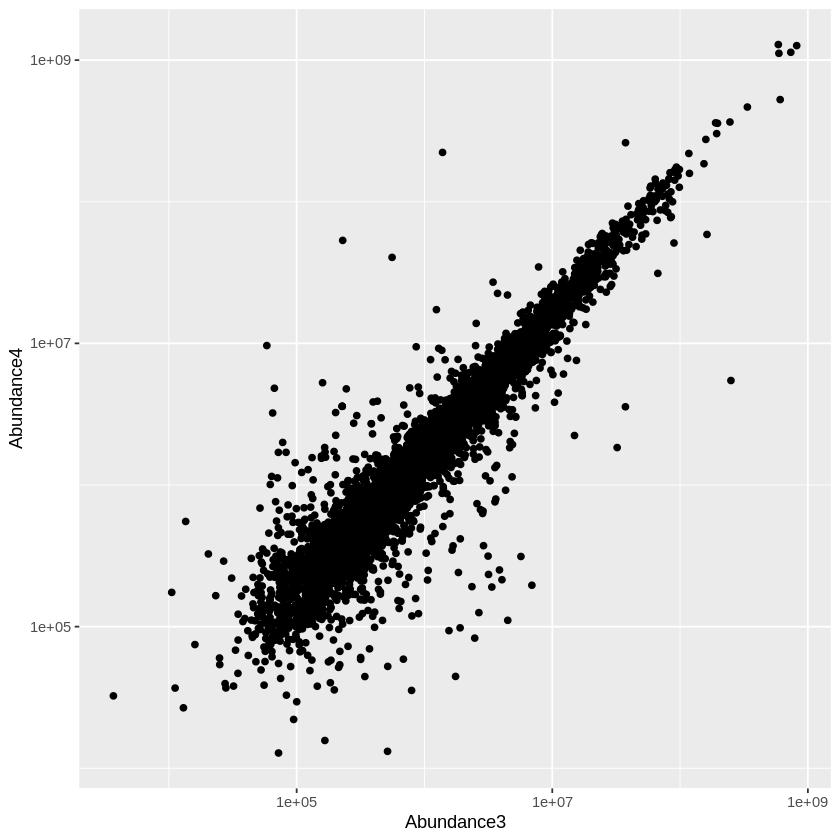

In [5]:
## Compare abundances of two samples
proteins %>%
select(Protein.Accession, Abundance3 = Intensity_2047_fin_03.calib, Abundance4 = Intensity_2047_fin_04.calib) %>%
ggplot(aes(x = Abundance3, y = Abundance4)) +
geom_point(na.rm = TRUE) +
scale_x_continuous(trans = "log10") +
scale_y_continuous(trans = "log10")
